Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2018/2019
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.2  
Zadnji put ažurirano: 26. listopada 2018.*

(c) 2015-2018 Jan Šnajder, Domagoj Alagić  

Objavljeno: **26. listopada 2018.**  
Rok za predaju: **5. studenog 2018. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [2]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [3]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Accuracy of this classification model is : 1.0


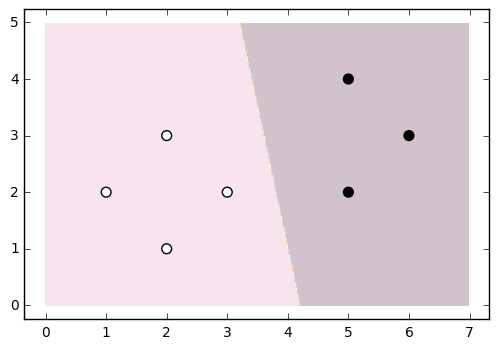

In [4]:
# Vaš kôd ovdje...
ridgeClassifier = RidgeClassifier(alpha=0)
ridgeClassifier.fit(X=seven_X,y=seven_y)
y_predict = ridgeClassifier.predict(seven_X)
print('Accuracy of this classification model is : ' + str(accuracy_score(seven_y,y_predict)))
mlutils.plot_2d_clf_problem(X=seven_X,y=seven_y,h=ridgeClassifier.predict)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

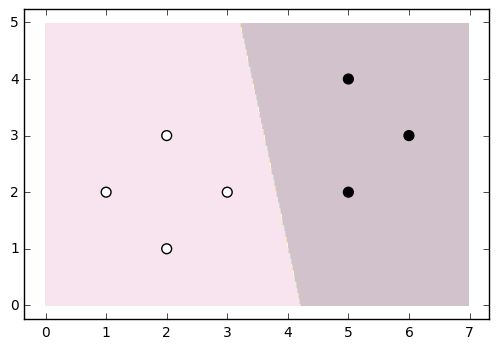

In [5]:
# Vaš kôd ovdje...
linearRegModel = LinearRegression().fit(seven_X,seven_y)
mlutils.plot_2d_clf_problem(seven_X,seven_y, lambda x : linearRegModel.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [6]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

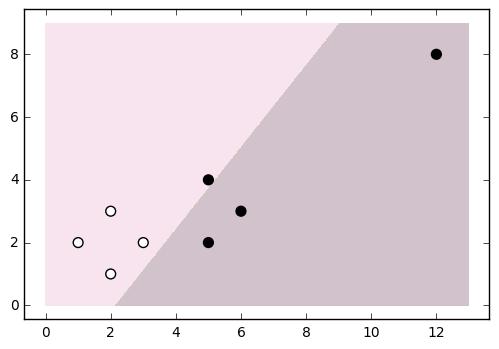

In [7]:
# Vaš kôd ovdje...
linearRegModel1 = LinearRegression().fit(outlier_X,outlier_y)
mlutils.plot_2d_clf_problem(outlier_X,outlier_y, lambda x : linearRegModel1.predict(x) >= 0.5)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [8]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

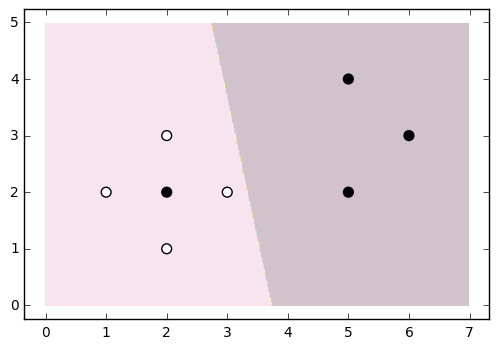

In [9]:
# Vaš kôd ovdje...
linearRegModel2 = LinearRegression().fit(unsep_X,unsep_y)
mlutils.plot_2d_clf_problem(unsep_X,unsep_y, lambda x : linearRegModel2.predict(x) >= 0.5)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

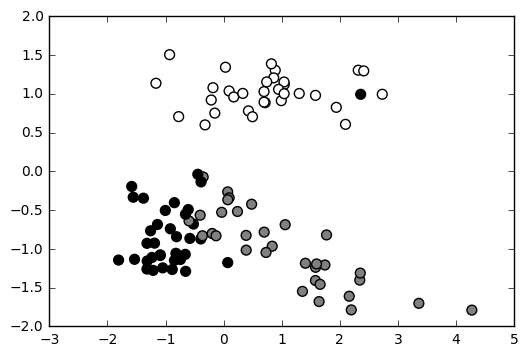

In [10]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje...
data_X,data_y = make_classification(n_features=2,n_informative=2,n_redundant= 0,n_classes = 3,n_clusters_per_class=1)
mlutils.plot_2d_clf_problem(data_X,data_y,h=None)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

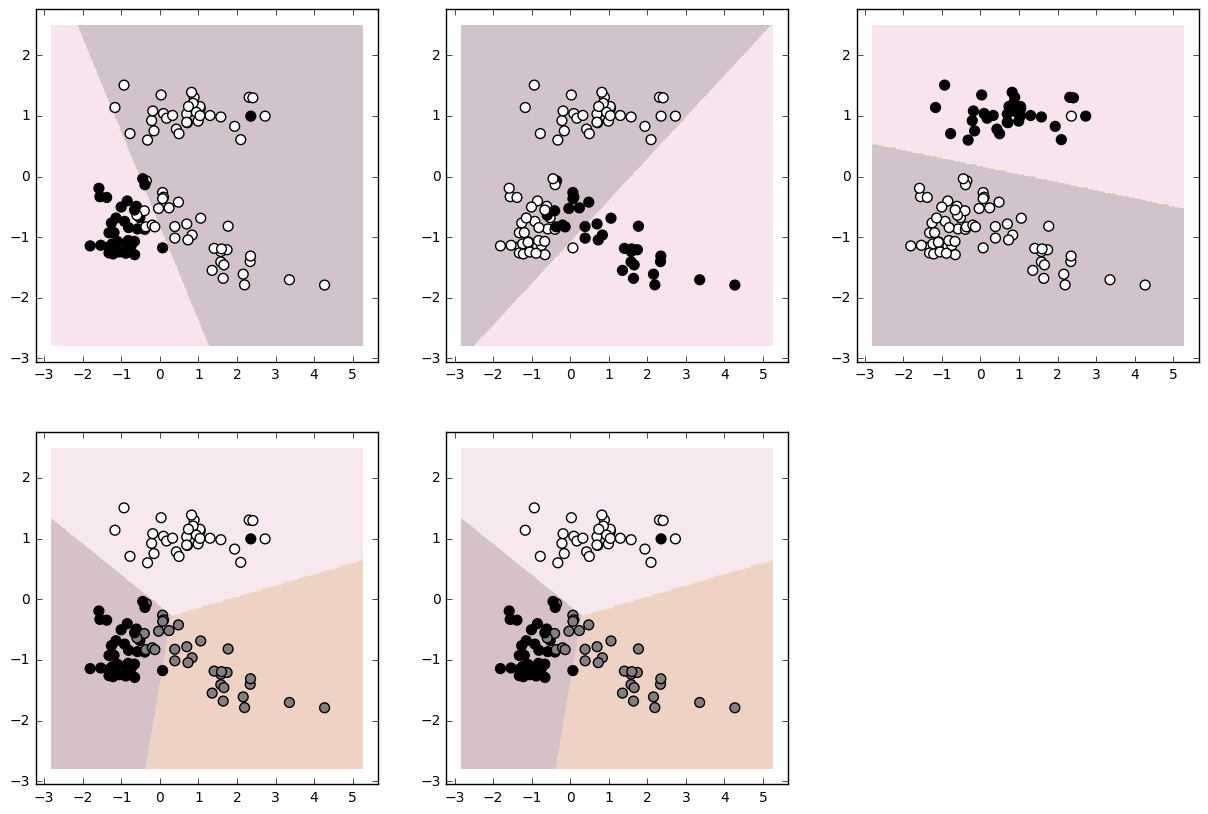

In [11]:
# Vaš kôd ovdje...
from sklearn.linear_model import LinearRegression, RidgeClassifier

#imaj 3 y-a..u svakom prema njegovoj vrijednosti dodaj u taj,za X je svugdje cijeli X(tj. data_X)
#fittas sve i onda gledas koji je od tih svih max kad ides za taj model predict,znaci radis predict za svaki(linearRegression)
#taj h_max je h(hipoteza koja odvaja) u grafu
y1 = []
y2 = []
y3 = []

#1 --> negative ,and we switched 0 to -1 for positive for easier predictions,border is 0 in this case,if it was <0,1> it would be 0.5
for el in data_y:
    if (el == 0):
        y1.append(-1)
        y2.append(1)
        y3.append(1)
        
    elif (el == 1):
        y1.append(1)
        y2.append(-1)
        y3.append(1)
        
    elif (el == 2):
        y1.append(1)
        y2.append(1)
        y3.append(-1)


LinearRegModel1 = LinearRegression().fit(data_X,y1)
LinearRegModel2 = LinearRegression().fit(data_X,y2)
LinearRegModel3 = LinearRegression().fit(data_X,y3)

h1 = lambda x : LinearRegModel1.predict(x) <= 0

h2 = lambda x : LinearRegModel2.predict(x) <= 0

h3 = lambda x : LinearRegModel3.predict(x) <= 0

h_argmax = lambda x: np.argmin([LinearRegModel1.predict(x.reshape(1, -1)), LinearRegModel2.predict(x.reshape(1, -1)), LinearRegModel3.predict(x.reshape(1, -1))])

rClassifier = RidgeClassifier(alpha=0)
rClassifier.fit(data_X,data_y)
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
mlutils.plot_2d_clf_problem(data_X,y1,h1)
plt.subplot(2,3,2)
mlutils.plot_2d_clf_problem(data_X,y2,h2)
plt.subplot(2,3,3)
mlutils.plot_2d_clf_problem(data_X,y3,h3)
plt.subplot(2,3,4)
mlutils.plot_2d_clf_problem(data_X,data_y,h_argmax)
plt.subplot(2,3,5)
mlutils.plot_2d_clf_problem(data_X,data_y,rClassifier.predict)
plt.show()
plt.close()

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

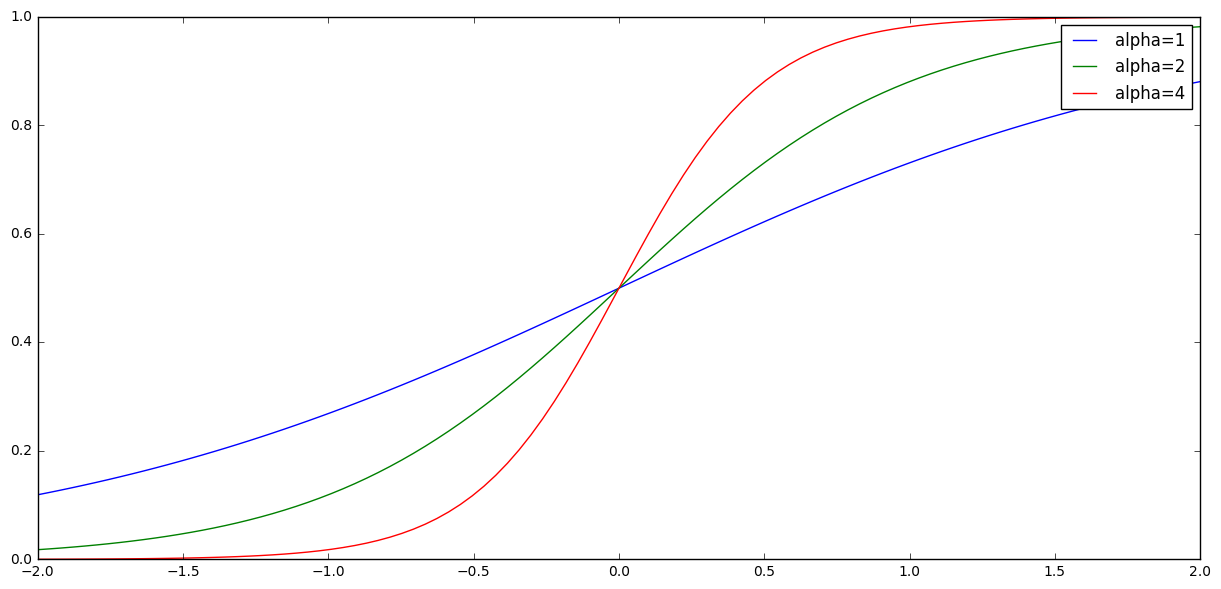

In [12]:
# Vaš kôd ovdje...
def sigmoid(x):
    return 1/(1+np.exp(-x))
alphas = [1,2,4]
N=100
X = np.linspace(-2,2,N)
plt.figure(figsize=(15,7))
for alpha in alphas:
    plt.plot(X,sigmoid(X*alpha))
   
plt.legend(['alpha=1','alpha=2','alpha=4'])
plt.show()
plt.close()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [23]:
# Vaš kôd ovdje...
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn.metrics import log_loss
#ndarray se inace ne koristi,nego np.array,ali vidjet cemo sta cemo koristiti..

def total_cross_entropy_error(X,y,w):
    sum = 0.0
    for i in range(len(X)):
        sum+=cross_entropy_error(X[i],y[i],w)
    sum = sum/len(X)    
    return sum

def cross_entropy_error(X,y,w):
    #pogreska unakrsne entropije modela na oznacenom skupu (X,y) uz pripadajuce tezine
    error = 0
    error = -(y * np.log(lr_h(X,w)) + (1-y)*np.log(1-lr_h(X,w)))
    return error

def lr_h(x,w):
    #daje predikciju za primjer x uz zadane tezine w,vraca h(x)
    Phi_x = pf(1).fit_transform(x.reshape(1,-1))
    return sigmoid(np.dot(Phi_x,w))
    

def lr_train(X,y,eta=0.01,max_iter=2000,alpha=0,epsilon=0.0001,trace = False):
    curr_iteration = 1
    #first error is big so it doesn't break just in start
    init_error = X.size * X.size
    #3 and not 2 coz it's tilda so + w0
    w=np.zeros((X[1].size+1,), dtype=float)
    trace_w = []
    while(curr_iteration <= max_iter):
        delta_w0 = 0
        #this one below is without w0 coz we're doing L2 reguralization batch gradient descent
        delta_w=np.zeros((X[1].size,), dtype=float)
        curr_error = 0
        for i in range(np.shape(X)[0]):
            h_x = lr_h(X[i],w)
            delta_w0+=h_x - y[i]
            delta_w+=(h_x-y[i])*X[i]
            curr_error+=cross_entropy_error(X[i],y[i],w)
        
        if (np.abs(curr_error - init_error) < epsilon):
            print ("Abs error is too close to epsilon,breaking the loop")
            print("Eta was : " + str(eta))
            break   
        else:
            init_error = curr_error
            
        w[0]+=-eta*delta_w0
        w[1:]=w[1:]*(1-eta*alpha) - eta*delta_w
        trace_w.extend(w)
        curr_iteration=curr_iteration+1
       
    if (trace):
        return w,trace_w
    
    else:
        return w               

#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

Cross-entropy error is: [ 0.05614825]


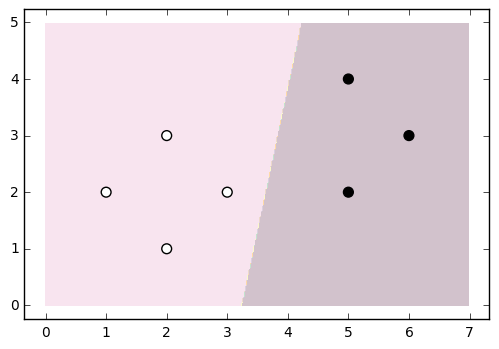

In [24]:
# Vaš kôd ovdje...
w = lr_train(seven_X,seven_y,max_iter=3000)
h_c = lambda x : lr_h(x,w)>=0.5
errorRate = total_cross_entropy_error(seven_X,seven_y,w)
print("Cross-entropy error is: " + str(errorRate))
mlutils.plot_2d_clf_problem(seven_X,seven_y,h_c)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

Abs error is too close to epsilon,breaking the loop
Eta was : 0.05
Abs error is too close to epsilon,breaking the loop
Eta was : 0.1


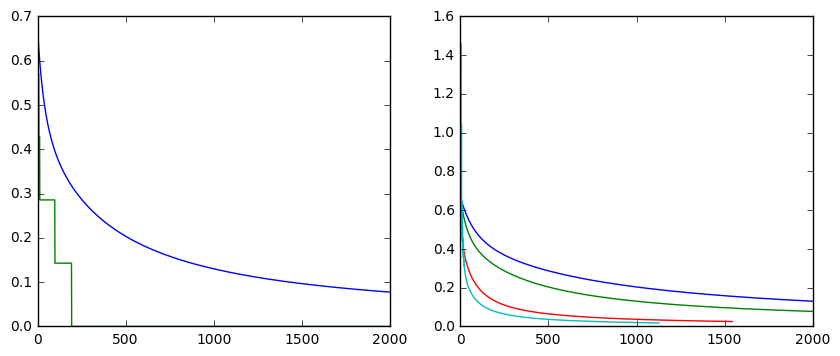

In [15]:
# Vaš kôd ovdje...
from sklearn.metrics import zero_one_loss
etas = [0.005,0.01,0.05,0.1]
w3 = []
w3_trace = []
cross_ent_error = []
zero_one_error = []
etas_error = []
Phi_x2 = pf(1).fit_transform(seven_X)
h_x2 = lambda x: x >= 0.5
w3,w3_trace = lr_train(seven_X,seven_y,trace=True)
for i in range(0, len(w3_trace), 3):
    y_pred = h_x2(sigmoid(np.dot(Phi_x2,w3_trace[i:i+3])))
    zero_one_error.append(zero_one_loss(y_true=seven_y,y_pred=y_pred))
    cross_ent_error.append(cross_entropy_loss(seven_X,seven_y,w3_trace[i:i+3]))
    
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(cross_ent_error)
plt.plot(zero_one_error)

for val in etas:
    singleErr = []
    w3_1,w3_1_trace = lr_train(seven_X,seven_y,eta=val,trace=True)
    
    for j in range(0,len(w3_1_trace), 3):
        cross_ent_loss = cross_entropy_loss(seven_X,seven_y,w3_1_trace[j:j+3])
        singleErr.append(cross_ent_loss)
        
    etas_error.append(singleErr)    

plt.subplot(1,2,2)
for i in range(len(etas_error)):
    plt.plot(etas_error[i])
plt.show()
plt.close()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

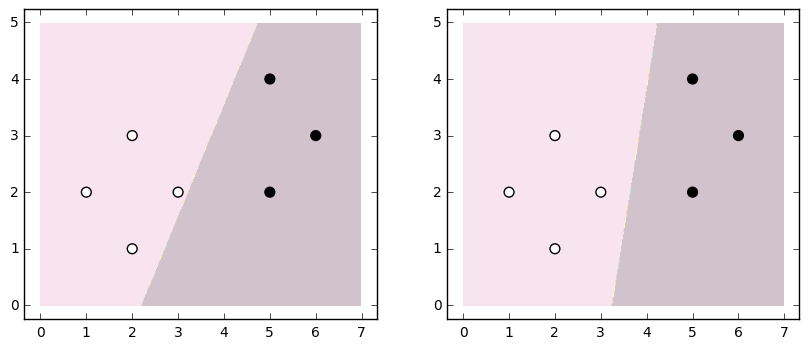

In [16]:
from sklearn.linear_model import LogisticRegression

# Vaš kôd ovdje...
logisticModel = LogisticRegression(max_iter=1000,C=5,tol=0.001).fit(seven_X,seven_y)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
mlutils.plot_2d_clf_problem(seven_X,seven_y,logisticModel.predict)
plt.subplot(1,2,2)
mlutils.plot_2d_clf_problem(seven_X,seven_y,h_c)

### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

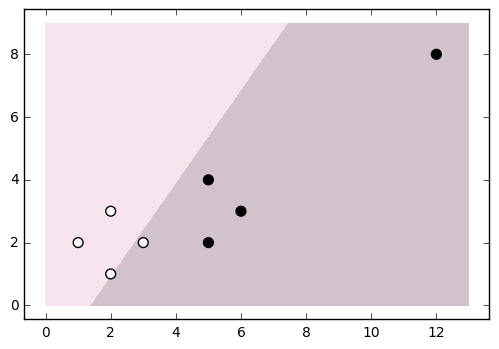

In [17]:
# Vaš kôd ovdje...
logisticModel4 = LogisticRegression().fit(outlier_X,outlier_y)
mlutils.plot_2d_clf_problem(outlier_X,outlier_y,logisticModel4.predict)

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


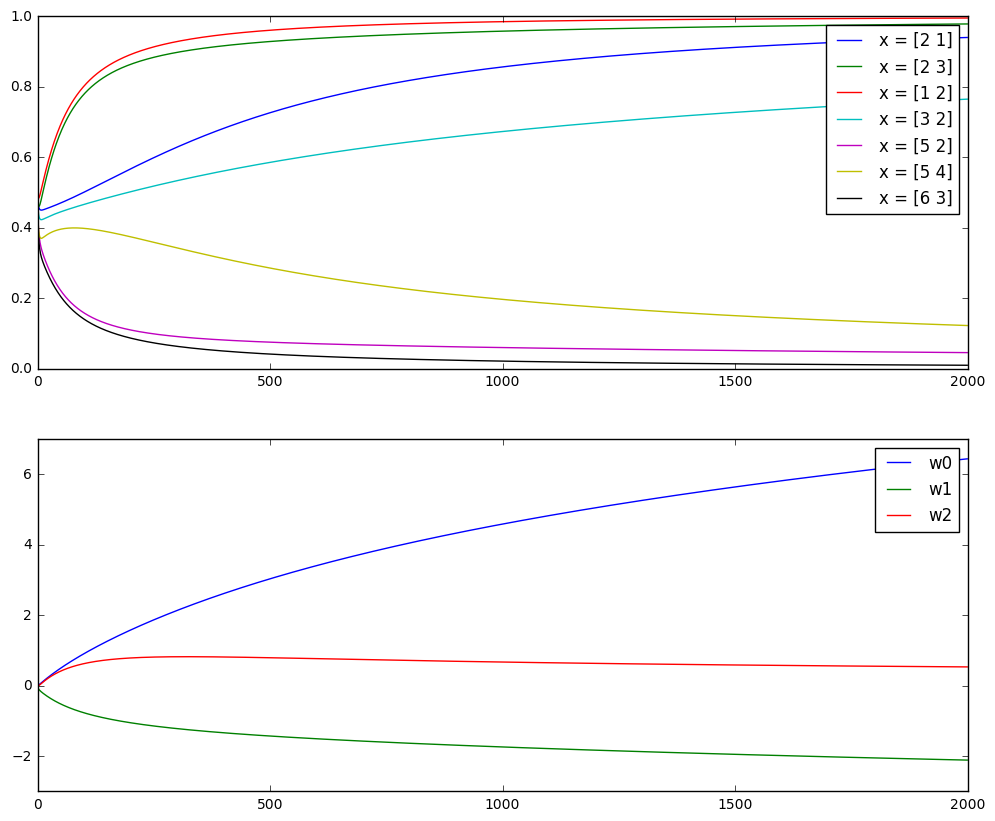

In [140]:
# Vaš kôd ovdje...
w4,w4_trace = lr_train(seven_X,seven_y,trace=True)
w0 = []
w1 = []
w2 = []
h4_x = []
firstTime = True
for i in range(len(seven_X)):
    h_x = []
    
    for j in range(0,len(w4_trace),3):
        if (firstTime):
            w0.append(w4_trace[j])
            w1.append(w4_trace[j+1])
            w2.append(w4_trace[j+2])
        h_x.append(lr_h(seven_X[i],w4_trace[j:j+3]))
        
    firstTime = False
    h4_x.append(h_x)

plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
for z in range(len(h4_x)):
    plt.plot(h4_x[z])
    
plt.legend(['x = ' + str(seven_X[0]),'x = ' + str(seven_X[1]),'x = '+ str(seven_X[2]),'x = '+ str(seven_X[3]),'x = '+ str(seven_X[4]),'x = '+ str(seven_X[5]),'x = '+ str(seven_X[6])])    


plt.subplot(2,1,2)
plt.plot(w0)
plt.plot(w1)
plt.plot(w2)
plt.legend(['w0','w1','w2'])
plt.show()
plt.close()

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

Abs error is too close to epsilon,breaking the loop
Eta was : 0.01


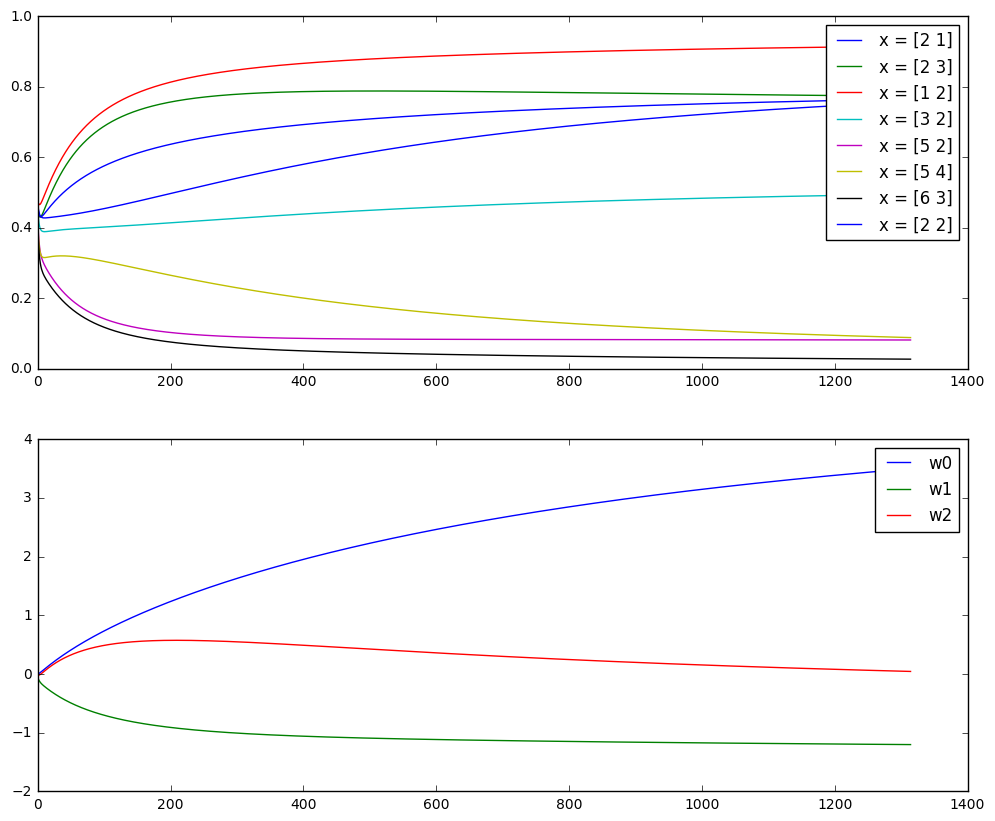

8


In [146]:
# Vaš kôd ovdje...
w4,w4_trace = lr_train(unsep_X,unsep_y,trace=True)
w0 = []
w1 = []
w2 = []
h4_x = []
firstTime = True
for i in range(len(unsep_X)):
    h_x = []
    
    for j in range(0,len(w4_trace),3):
        if (firstTime):
            w0.append(w4_trace[j])
            w1.append(w4_trace[j+1])
            w2.append(w4_trace[j+2])
        h_x.append(lr_h(unsep_X[i],w4_trace[j:j+3]))
        
    firstTime = False
    h4_x.append(h_x)

plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
for z in range(len(h4_x)):
    plt.plot(h4_x[z])
    
plt.legend(['x = ' + str(unsep_X[0]),'x = ' + str(unsep_X[1]),'x = '+ 
            str(unsep_X[2]),'x = '+ str(unsep_X[3]),'x = '+ 
            str(unsep_X[4]),'x = '+ str(unsep_X[5]),'x = '+ 
            str(unsep_X[6]),'x = '+ 
            str(unsep_X[7])])    


plt.subplot(2,1,2)
plt.plot(w0)
plt.plot(w1)
plt.plot(w2)
plt.legend(['w0','w1','w2'])
plt.show()
plt.close()

print(len(h4_x))

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [147]:
from numpy.linalg import norm

Abs error is too close to epsilon,breaking the loop
Eta was : 0.01
Abs error is too close to epsilon,breaking the loop
Eta was : 0.01


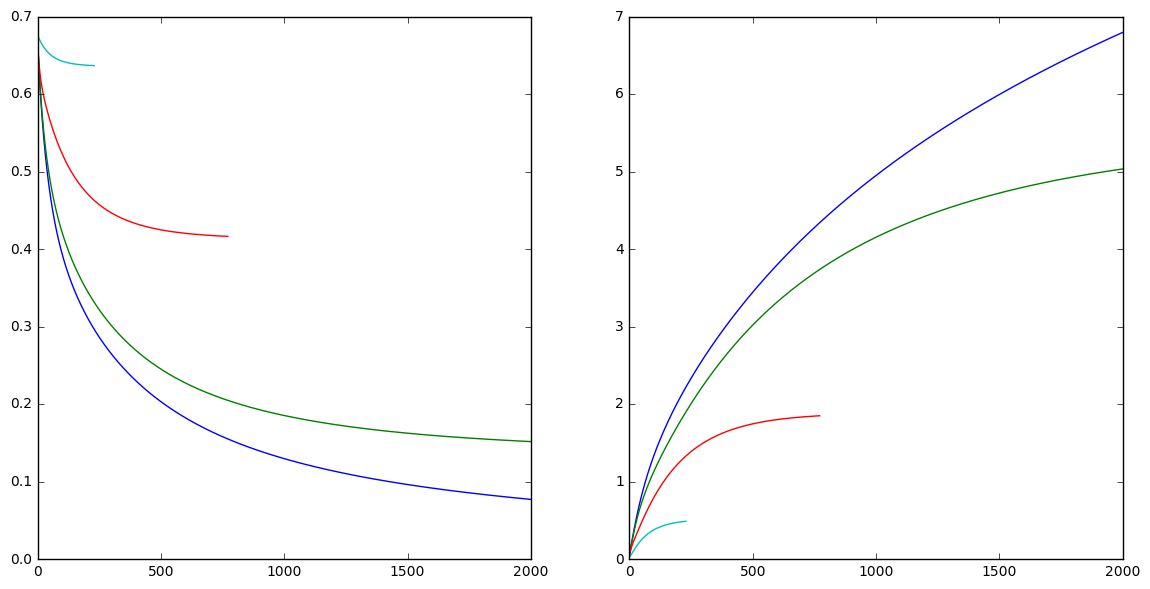

In [154]:
# Vaš kôd ovdje...
alphas = [0,1,10,100]

norms = []
errors = []
for alpha in alphas:
    w5,w5_trace = lr_train(seven_X,seven_y,alpha=alpha,trace=True)
    singleError = []
    singleNorm = []
    
    for i in range(0,len(w5_trace),3):
        singleWeight = w5_trace[i:i+3]
        singleError.append(cross_entropy_loss(seven_X,seven_y,singleWeight))
        singleNorm.append(norm(singleWeight))
                               
    norms.append(singleNorm)
    errors.append(singleError)
    
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
for i in range(len(errors)):
    plt.plot(errors[i])
plt.subplot(1,2,2)
for i in range(len(norms)):
    plt.plot(norms[i])


### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [176]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
    
#poly = PolynomialFeatures(2)
#...
#mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

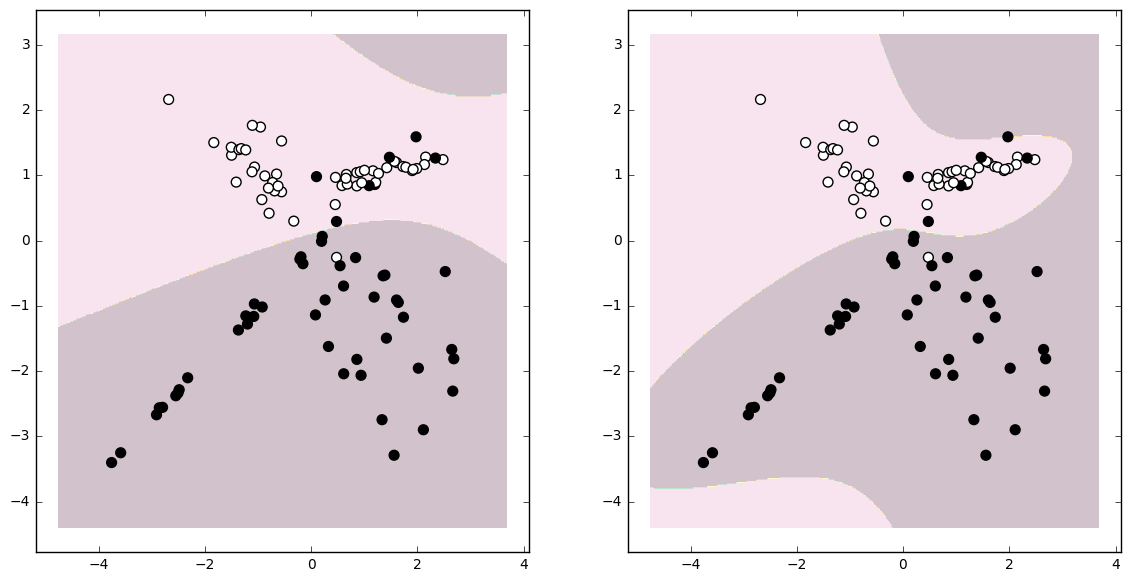

In [175]:
# Vaš kôd ovdje...
data6_X,data6_y = make_classification(n_features=2,n_informative=2,n_redundant= 0,n_classes = 2,n_clusters_per_class=2)
ds = [2,3]

count = 1
plt.figure(figsize=(14,7))
for d in ds:
    poly = PolynomialFeatures(d)
    Phi_x = poly.fit_transform(data6_X)
    model = LogisticRegression(C=5).fit(Phi_x,data6_y)
    plt.subplot(1,2,count)
    mlutils.plot_2d_clf_problem(data6_X, data6_y, lambda x : model.predict(poly.transform(x)))
    count = count + 1
    
plt.show()
plt.close()

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?